In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from joblib import load

# Define the path to the dataset in Google Drive
data_path = '/content/drive/MyDrive/Mango_db/MangoLeafBD Dataset'  # Update this to your actual path

# Define paths for different disease categories
categories = ['Healthy', 'Powdery Mildew', 'Anthracnose','Bacterial Canker','Cutting Weevil','Die Back']  # Update with your actual categories
image_size = (128, 128)

def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, image_size)  # Resize for uniformity
            images.append(img)
            labels.append(label)
    return images, labels

# Load images and labels from all categories
all_images = []
all_labels = []
for category in categories:
    category_path = os.path.join(data_path, category)
    print(f"Loading images from {category_path}")  # Debugging print statement
    images, labels = load_images_from_folder(category_path, category)
    all_images.extend(images)
    all_labels.extend(labels)

# Convert to numpy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Encode labels
label_encoder = LabelEncoder()
all_labels = label_encoder.fit_transform(all_labels)  # Convert string labels to numerical labels

# Flatten the images
n_samples, height, width, n_channels = all_images.shape
X = all_images.reshape(n_samples, -1)
y = all_labels



Loading images from /content/drive/MyDrive/Mango_db/MangoLeafBD Dataset/Healthy
Loading images from /content/drive/MyDrive/Mango_db/MangoLeafBD Dataset/Powdery Mildew
Loading images from /content/drive/MyDrive/Mango_db/MangoLeafBD Dataset/Anthracnose
Loading images from /content/drive/MyDrive/Mango_db/MangoLeafBD Dataset/Bacterial Canker
Loading images from /content/drive/MyDrive/Mango_db/MangoLeafBD Dataset/Cutting Weevil
Loading images from /content/drive/MyDrive/Mango_db/MangoLeafBD Dataset/Die Back


In [20]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
model = SVC(kernel='linear', decision_function_shape='ovr')  # Using One-vs-Rest strategy
model.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
# Predict on the test set
y_pred = model.predict(X_test)



In [18]:
# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.9416666666666667
Classification Report:
                   precision    recall  f1-score   support

     Anthracnose       0.95      0.95      0.95        96
Bacterial Canker       0.89      0.97      0.93       101
  Cutting Weevil       0.98      0.98      0.98        91
        Die Back       0.97      0.93      0.95        95
         Healthy       0.93      0.95      0.94       118
  Powdery Mildew       0.96      0.88      0.92        99

        accuracy                           0.94       600
       macro avg       0.94      0.94      0.94       600
    weighted avg       0.94      0.94      0.94       600



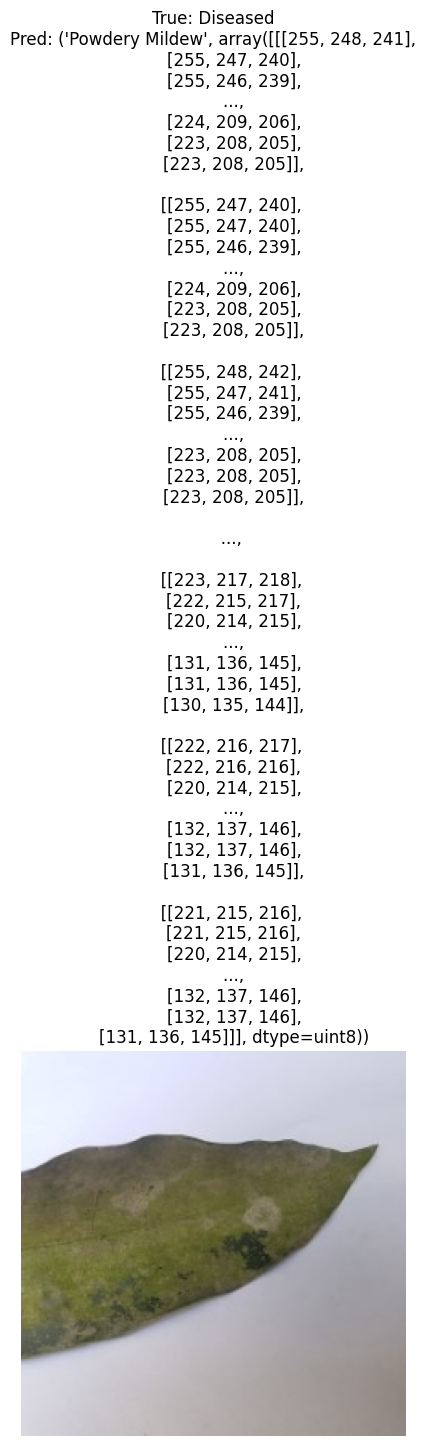

In [23]:
import matplotlib.pyplot as plt
import cv2

# Function to display image with prediction
def display_prediction(image, true_label, pred_label):
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.show()

# Example usage
new_image_path = '/content/powdery mildew.jpeg'  # Update this to the actual path
predicted_label = predict_image(new_image_path, model, label_encoder)
#print("Predicted label:", predicted_label)
# Load the image for display
image = cv2.imread(new_image_path)


# Display the prediction
display_prediction(image, "Diseased", predicted_label)


In [33]:
!pip install streamlit opencv-python-headless scikit-learn matplotlib

In [34]:
import joblib

# Assume your trained model and label encoder are named `model` and `label_encoder`
joblib.dump(model, 'svm_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']

In [41]:
import streamlit as st
import cv2
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder

# Load the trained model and label encoder
model = joblib.load('svm_model.pkl')
label_encoder = joblib.load('label_encoder.pkl')

# Function to predict the label of an image
def predict_image(img, model, label_encoder):
    if img is not None:
        img = cv2.resize(img, (128, 128))
        img_flattened = img.flatten().reshape(1, -1)
        prediction = model.predict(img_flattened)
        label = label_encoder.inverse_transform(prediction)
        return label[0]
    else:
        return "Invalid image"

# Function to display image with prediction
def display_prediction(image, pred_label):
    st.image(image, channels="RGB")
    st.write(f"Predicted: {pred_label}")

# Streamlit app
st.title("Mango Leaf Disease Prediction")

uploaded_files = st.file_uploader("Upload Mango Leaf Images", type=['jpg', 'jpeg', 'png'], accept_multiple_files=True)

if uploaded_files:
    for uploaded_file in uploaded_files:
        file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
        image = cv2.imdecode(file_bytes, 1)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Predict and display
        pred_label = predict_image(image, model, label_encoder)
        display_prediction(image_rgb, pred_label)


In [40]:
!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.247.79.185:8501

  Stopping...
^C
